In the class we have implemented a polynomial object, that is extended as below.



1. We show how to define the $+$ operator to implement the addition operation of two polynomials. The current implementation is incomplete as it can not add $p(x) = x^2 + 2x + 3$ and $q(x) = x+4$ if these are defined as arrays of different sizes. You should fix this

2. Implement the substraction $-$ (method sub)

3. Implement multiplication $*$ (method mul). Note that this is equivalent to the convolution of the coefficients

4. Implement ploting the graph of the polynomial (method plot). In this function, you should use matplotlib

In [19]:
class polynomial(object):
    def __init__(self, c, v):
        self.coeff = c
        self.v = v
    def __repr__(self):
        D = len(self.coeff)
        for i in range(D):
            if i<D-1:
                print(self.coeff[i], end='')
                print('{}^{} '.format(self.v, D-i-1), end='')
            else:
                print(self.coeff[i])
        
        return str(self.coeff)
    def __add__(self,b):
        """Computes a+b and returns the result"""
        ### Note:  This code does not add polynomials 
        ###        of different orders so you must fix this
        D = len(self.coeff)
        
        coeff = []
        for i in range(D):
            coeff.append(self.coeff[i] + b.coeff[i])
        
        return polynomial(coeff, self.v)
    def __sub__(self,b):
        """Computes a-b and returns the result"""
        print('Implement me')
        return polynomial([],self.v)
    def __mul__(self,b):
        """Computes a*b and returns the result"""
        print('Implement me')
        return polynomial([],self.v)
    def plot(self, number_of_points=100, left=-1, right=1):
        """
            Evaluates the polynomial at number_of_points equally spaced 
            points between left and right and plots the result using matplotlib
        """
        print('implement me')
        return
    
    
p = polynomial([2,3,1], 'z')
print(p)

q = polynomial([0,4,4], 'z')
# Your program must also work when we define more naturally
# q = polynomial([4,4], 'z')
print(q)

print('--------------------')
print('Result of p + q:')
r1 = p + q
print(r1)

print('--------------------')
print('Result of p - q:')
r2 = p - q
print(r2)

print('--------------------')
print('Result of p * q:')
r3 = p * q
print(r3)

print('--------------------')
# Generates a plot
p.plot()
print('We should see a plot here')
              
      

2z^2 3z^1 1
[2, 3, 1]
0z^2 4z^1 4
[0, 4, 4]
--------------------
Result of p + q:
2z^2 7z^1 5
[2, 7, 5]
--------------------
Result of p - q:
Implement me
[]
--------------------
Result of p * q:
Implement me
[]
--------------------
implement me
We should see a plot here


In [43]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc
import pandas as pd
# 
# import seaborn as sns
# sns.set(color_codes=True)

# plt.figure(figsize=(5,5))
# df = pd.read_csv(u'data/wind_tribune.csv')
# sns.jointplot(x='wind_speed', y='production', data=df);
# plt.show()

In [72]:

a = np.array([1,2,3,4,5,9,11])

a[:-3:-1]

array([11,  9])

0.2z^5 -2z^4 -2z^3 -3z +1 
-1z^3 +4z^2 +4z -4 


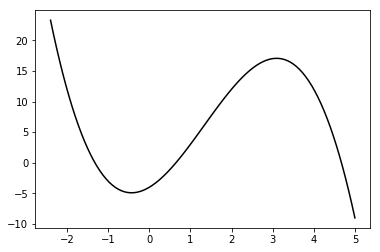

In [85]:
import numpy as np


class polynomial(object):
    def __init__(self, c, v='x'):
        self.coeff = c
        self.v = v
    def __repr__(self):
        coeff = self.coeff
        v = self.v
        s = ''
        D = len(coeff)
        
        first = True
        
        for i in range(D):
            pw = D-i-1
            pre = '+' if coeff[i]>0 else ''

            if first:
                if pre=='+':
                    pre = ''
                first = False
            

            if pw == 0:
                vname = ''
            elif pw == 1:
                vname = v
            else:
                vname = v + '^'+ str(pw)

            if coeff[i] != 0:
                s += pre+str(coeff[i])+ vname + ' '
                
        return s
    def __add__(self,b):
        """Computes a+b and returns the result"""
        ### Note:  This code does not add polynomials 
        ###        of different orders so you must fix this
        L_a = len(self.coeff)
        L_b = len(b.coeff)
        
        coeff = self.coeff if L_a > L_b else b.coeff
        short = self.coeff if L_a <= L_b else b.coeff
        
        for i in range(len(short)):
            coeff[-1-i] += short[-1-i]
            
        return polynomial(coeff, self.v)
    def __sub__(self,b):
        """Computes a-b and returns the result"""
        print('Implement me')
        return polynomial([],self.v)
    def __mul__(self,b):
        """Computes a*b and returns the result"""
        coeff = np.polymul(self.coeff, b.coeff)
        return polynomial(coeff,self.v)
    def deriv(self):
        coeff = []
        D = len(self.coeff)
        for i in range(D-1):
            pw = D-i-1
            coeff.append(pw*self.coeff[i])
        
        if coeff == []:
            coeff = [0]
        
        return polynomial(coeff, self.v)
        
    def plot(self, number_of_points=100, left=-1, right=1):
        """
            Evaluates the polynomial at number_of_points equally spaced 
            points between left and right and plots the result using matplotlib
        """
        x = np.linspace(left,right,number_of_points)
        y = np.polyval(self.coeff, x)
        plt.plot(x, y, 'k')
        plt.show()
        
        return
    
    
p = polynomial([0.2, -2, -2, 0,-3,1], 'z')
print(p)

q = polynomial([-1, 4,4,-4], 'z')
print(q)

q.plot(left=-2.4, right=5)

r = p+q

In [90]:
p = polynomial([0.2, -2, -2, 0,-3,1], 'z')
print(p)

q = p.deriv().deriv()
q

0.2z^5 -2z^4 -2z^3 -3z +1 


4.0z^3 -24z^2 -12z 

In [83]:
s = polynomial([1,-1])*polynomial([1,1])*polynomial([1,3,1])
s

1x^4 +3x^3 -3x -1 

In [76]:
np.polymul(q.coeff, p.coeff)

array([ -0.2,   2.8,  -4.2, -24.8,  11. ,  35. , -24. , -16. ,  12. ])

In [20]:
q = polynomial([0,4,4], 'z')
# Your program must also work when we define more naturally
# q = polynomial([4,4], 'z')
print(q)

print('--------------------')
print('Result of p + q:')
r1 = p + q
print(r1)

print('--------------------')
print('Result of p - q:')
r2 = p - q
print(r2)

print('--------------------')
print('Result of p * q:')
r3 = p * q
print(r3)

print('--------------------')
# Generates a plot
p.plot()
print('We should see a plot here')
              

2z^2 3z^1 1
[2, 3, 1]
0z^2 4z^1 4
[0, 4, 4]
--------------------
Result of p + q:
2z^2 7z^1 5
[2, 7, 5]
--------------------
Result of p - q:
Implement me
[]
--------------------
Result of p * q:
Implement me
[]
--------------------
implement me
We should see a plot here
